In [2]:
#.libPaths(c('/usr/share/R/library','/usr/lib64/R/library',''))
suppressMessages(library(SingleCellExperiment))
suppressMessages(library(scater))
options(stringsAsFactors = FALSE)
setwd("~/projects/training")

## 8.4 对四种feature做！
- 第一种是斌斌call 出来的所有的domain
- 第二种是有structure的domain
- 第三种是卡一下domain出现的频率和表达量
- 第四种就是把第二种和第三种的要求都加上

- 挑选原则，不加postoperative

#### load data & annotations

In [3]:
wholeanno <-read.table('data/wholeannotation.csv',sep=',',header=T)[seq(1,64),]
wholeanno$Class <- "Ctrl"
wholeanno[which(wholeanno$Disease_status=="HCC_before_surgery"),"Class"] <- "HCC"

In [4]:
wholeanno$Sample_ID

[1] "lulab_249136_B"   "lulab_385247_B"   "lulab_423976_B"   "lulab_497411_B"  
 [5] "lulab_497497_B"   "lulab_498127_B"   "lulab_498187_B"   "lulab_498221_B"  
 [9] "lulab_507450_B"   "lulab_507468_B"   "lulab_507511_B"   "lulab_507599_B"  
[13] "lulab_507867_B"   "lulab_507887_B"   "lulab_507891_B"   "lulab_507909_B"  
[17] "lulab_508877_B"   "lulab_508897_B"   "lulab_511030_B"   "lulab_511485_B"  
[21] "lulab_515058_B"   "lulab_515292_B"   "lulab_SH325716_B" "lulab_SH327409_B"
[25] "lulab_SH327412_B" "lulab_SH327428_B" "lulab_17402567_B" "lulab_3497470_B" 
[29] "lulab_5474594_B"  "lulab_6474170_B"  "lulab_8397116_B"  "lulab_BD.LOW.mix"
[33] "lulab_LY"         "lulab_CXD"        "lulab_Normal_1"   "lulab_Normal_2"  
[37] "lulab_Normal_3"   "lulab_Normal_4"   "lulab_Normal_5"   "lulab_Normal_6"  
[41] "lulab_Normal_7"   "lulab_Normal_8"   "lulab_498187_A"   "lulab_498221_A"  
[45] "lulab_385247_A"   "lulab_498191_A"   "lulab_511122_A"   "lulab_510199_A"  
[49] "lulab_333874_A"   "lulab_482592_A"   "lulab_486978_A"   "lulab_508955_A"  
[53] "lulab_509155_A"   "lulab_509442_A"   "lulab_509970_A"   "lulab_510470_A"  
[57] "lulab_515058_A"   "lulab_515292_A"   "lulab_10515058_A" "lulab_12402567_A"
[61] "lulab_13515292_A" "lulab_HBV_1"      "lulab_HBV_2"      "lulab_HBV_3"

In [48]:
raw_mx <- read.table('/Share/home/caojingyi/exRNA/process/18.new_hcc_lulab/08.new_peak/new1/all.01.14.count.mx', row.names = 1,skip=1,sep = "\t")
#colnames(raw_mx)<-wholeanno$Sample_ID

In [50]:
raw_mx

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,⋯,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44
peak_1;12979_0_60,239,112,116,209,130,91,142,125,66,109,⋯,25,54,59,33,70,51,274,50,81,61
peak_2;12985_20_72,249,218,110,232,64,62,49,107,57,145,⋯,92,49,116,78,87,129,196,102,125,94
peak_3;12991_20_72,216,215,115,263,67,57,50,98,61,134,⋯,108,44,94,113,92,118,184,115,126,104
peak_4;12993_0_72,826,486,394,948,295,311,266,408,217,400,⋯,105,186,174,125,208,191,824,182,290,190
peak_5;13011_0_60,311,515,370,253,77,146,432,387,378,780,⋯,340,266,258,390,491,658,212,407,391,383
peak_6;13013_20_72,589,285,276,816,221,244,139,279,114,198,⋯,29,102,105,63,53,54,712,83,164,77
peak_7;13014_20_72,442,245,252,643,184,173,111,213,95,160,⋯,19,75,80,48,84,49,587,58,134,66
peak_8;13016_0_40,55,52,326,126,25,89,592,133,187,127,⋯,71,89,75,64,104,108,62,112,103,81
peak_9;13026_0_40,270,1225,336,706,43,176,179,186,116,316,⋯,30,50,129,47,339,37,245,62,145,162
peak_10;13027_40_60,136,162,71,196,53,68,37,70,41,59,⋯,59,42,80,53,52,99,121,82,87,62


In [51]:
colnames(raw_mx)<-wholeanno[wholeanno$use ==1,]$Sample_ID

In [53]:
rowsums <-rowSums(raw_mx)
rowsumind <-order(-rowsums)
top20name <-rownames(raw_mx)[rowsumind[1:20]]
top20name

[1] "peak_371;ENST00000364908.1_0_80"  "peak_618;ENST00000385059.1_0_72" 
 [3] "peak_608;ENST00000385044.3_0_80"  "peak_189;ENST00000362134.1_0_72" 
 [5] "peak_236;ENST00000362309.3_0_40"  "peak_211;ENST00000362205.1_0_40" 
 [7] "peak_615;ENST00000385054.1_0_80"  "peak_232;ENST00000362291.1_0_80" 
 [9] "peak_228;ENST00000362280.3_0_40"  "peak_1183;ENST00000637446.1_0_64"
[11] "peak_1040;ENST00000612171.2_0_68" "peak_213;ENST00000362215.3_0_68" 
[13] "peak_208;ENST00000362201.2_0_80"  "peak_630;ENST00000385140.1_0_80" 
[15] "peak_635;ENST00000385201.1_0_80"  "peak_230;ENST00000362283.1_0_70" 
[17] "peak_668;ENST00000385277.1_0_80"  "peak_221;ENST00000362251.4_0_77" 
[19] "peak_209;ENST00000362202.3_0_40"  "peak_530;ENST00000384816.1_0_80"

In [63]:
new_raw_mx <-raw_mx[-which(rownames(raw_mx) %in% top20name), ]

In [64]:
print (dim(raw_mx))
print (dim(new_raw_mx))

[1] 1727   43
[1] 1707   43


In [65]:
wholeanno$Status <- "HD"
wholeanno[which(wholeanno$Stage.BCLC=="A"),"Status"] <- "A"
wholeanno[which(wholeanno$Stage.BCLC=="B"),"Status"] <- "B"
wholeanno[which(wholeanno$Stage.BCLC=="C"),"Status"] <- "C"
wholeanno[which(wholeanno$Disease_status=="HCC_after_surgery"),"Status"] <- "Postoperative"
wholeanno[which(wholeanno$Disease_status=="mixed by 5 HBV"),"Status"] <- "CHB"
wholeanno[which(wholeanno$Disease_status=="HCC_before_surgery"),"Disease_status"] <- "HCC"
wholeanno[which(wholeanno$Disease_status=="Healthy"),"Disease_status"] <- "HD"
wholeanno[which(wholeanno$Disease_status=="mixed by 5 HBV"),"Disease_status"] <- "CHB"

In [66]:
wholeanno$Disease_status

[1] "HCC"               "HCC"               "HCC"              
 [4] "HCC"               "HCC"               "HCC"              
 [7] "HCC"               "HCC"               "HCC"              
[10] "HCC"               "HCC"               "HCC"              
[13] "HCC"               "HCC"               "HCC"              
[16] "HCC"               "HCC"               "HCC"              
[19] "HCC"               "HCC"               "HCC"              
[22] "HCC"               "HCC"               "HCC"              
[25] "HCC"               "HCC"               "HCC"              
[28] "HCC"               "HCC"               "HCC"              
[31] "HCC"               "HD"                "HD"               
[34] "HD"                "HD"                "HD"               
[37] "HD"                "HD"                "HD"               
[40] "HD"                "HD"                "HD"               
[43] "HCC_after_surgery" "HCC_after_surgery" "HCC_after_surgery"
[46] "HCC_after_surgery" "HCC_after_surgery" "HCC_after_surgery"
[49] "HCC_after_surgery" "HCC_after_surgery" "HCC_after_surgery"
[52] "HCC_after_surgery" "HCC_after_surgery" "HCC_after_surgery"
[55] "HCC_after_surgery" "HCC_after_surgery" "HCC_after_surgery"
[58] "HCC_after_surgery" "HCC_after_surgery" "HCC_after_surgery"
[61] "HCC_after_surgery" "CHB"               "CHB"              
[64] "CHB"

#### drop some sample

In [67]:
wholeanno$Disease_status[wholeanno$use ==1]
#wholeanno$Sample_ID[wholeanno$use ==1]

[1] "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC"
[13] "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC"
[25] "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HD"  "HD"  "HD"  "HD"  "HD"  "HD" 
[37] "HD"  "HD"  "HD"  "HD"  "CHB" "CHB" "CHB"

In [68]:
wholeanno$Status[wholeanno$use ==1]

[1] "A"   "A"   "C"   "A"   "B"   "B"   "B"   "A"   "A"   "B"   "A"   "B"  
[13] "A"   "A"   "B"   "A"   "A"   "C"   "B"   "A"   "B"   "C"   "A"   "B"  
[25] "A"   "A"   "B"   "C"   "A"   "A"   "HD"  "HD"  "HD"  "HD"  "HD"  "HD" 
[37] "HD"  "HD"  "HD"  "HD"  "CHB" "CHB" "CHB"

<span class="mark">QC sample in another python jupyter, so freeze QC, drop some sample and start from imputation</span>

In [71]:
mx <-new_raw_mx

In [72]:
#print (dim(raw_mx))
print (dim(mx))
#print (dim(withoutaftermx))
# we use mx and withoutaftermx

[1] 1707   43


****************
#### construct singleCellExperiment object

In [73]:
reads <- SingleCellExperiment(
    assays = list(counts = as.matrix(mx)),
    colData = wholeanno[wholeanno$use ==1,])
reads

class: SingleCellExperiment 
dim: 1707 43 
metadata(0):
assays(1): counts
rownames(1707): peak_1;12979_0_60 peak_2;12985_20_72 ...
  peak_1726;piR-hsa-963_0_31 peak_1727;piR-hsa-993_0_28
rowData names(0):
colnames(43): lulab_249136_B lulab_385247_B ... lulab_HBV_2 lulab_HBV_3
colData names(27): X Sample_ID ... Class Status
reducedDimNames(0):
spikeNames(0):

In [74]:
reads$Disease_status

[1] "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC"
[13] "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC"
[25] "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HD"  "HD"  "HD"  "HD"  "HD"  "HD" 
[37] "HD"  "HD"  "HD"  "HD"  "CHB" "CHB" "CHB"

##### Remove genes that are not expressed in any samples

In [75]:
keep_feature <- rowSums(counts(reads) > 0) > 0
reads <- reads[keep_feature, ]
dim(reads)

[1] 1707   43

In [76]:
reads <-  calculateQCMetrics(reads)

****************
### filter samples and genes

In [77]:
reads$use <-rep(TRUE,dim(reads)[2])

#### gene QC
##### filter genes with too low expression

## <span class="mark">这里要注意，新的feature数量少，要少筛掉一些！</span>

In [78]:
filter_genes <- apply(counts(reads[, colData(reads)$use]), 1, function(x) length(x[x >= 1]) >= 4)
table(filter_genes)
rowData(reads)$use <- filter_genes
reducedDim(reads) <- NULL
dim(reads[rowData(reads)$use, colData(reads)$use])

filter_genes
TRUE 
1707 

[1] 1707   43

In [79]:
assay(reads, "logcounts_raw") <- log2(counts(reads) + 1)
reads.qc <- reads[rowData(reads)$use, colData(reads)$use]
endog_genes <- !rowData(reads.qc)$is_feature_control

In [80]:
dim(reads.qc)

[1] 1707   43

In [81]:
sum(counts(reads.qc)<0)

[1] 0

In [82]:
# save the data
saveRDS(reads.qc, file = "new_feature/tmpsave/feature_1.rds")
write.csv(counts(reads.qc), "new_feature/tmpsave/feature_1.rds.csv")

In [83]:
reads.qc$Disease_status

[1] "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC"
[13] "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC"
[25] "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HD"  "HD"  "HD"  "HD"  "HD"  "HD" 
[37] "HD"  "HD"  "HD"  "HD"  "CHB" "CHB" "CHB"

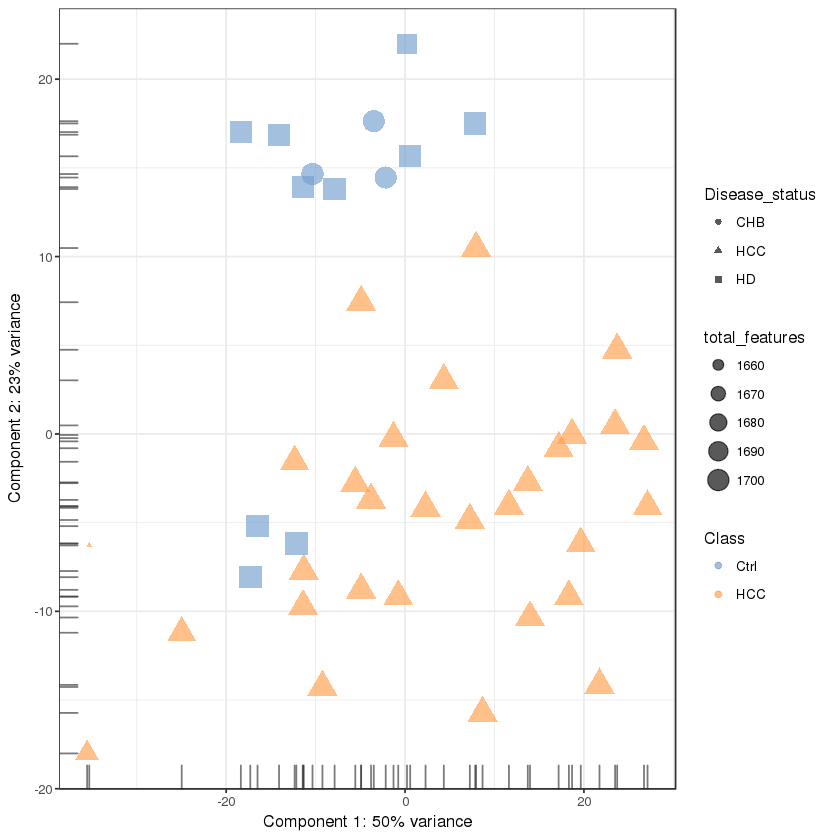

In [84]:
plotPCA(
    reads.qc[endog_genes, ],
    exprs_values = "logcounts_raw",
    colour_by = "Class",
    shape_by = "Disease_status",
    size_by = "total_features"
)

## imputation

In [85]:
suppressMessages(library("scImpute"))
reads.qc <- readRDS("new_feature/tmpsave/feature_1.rds")
sampleLables <- c()
for(i in colnames(reads.qc)){tmp <- as.character(wholeanno[which(wholeanno$Sample_ID==i),"Class"]); sampleLables <- c(sampleLables,tmp)}

In [86]:
scimpute(count_path = "new_feature/tmpsave/feature_1.rds.csv", infile = "csv", 
         outfile = "txt", out_dir = "new_feature/imputation/", Kcluster = 5, ncores = 2, labels = as.vector(sampleLables), labeled = TRUE)

[1] "reading in raw count matrix ..."
[1] "number of genes in raw count matrix 1707"
[1] "number of cells in raw count matrix 43"
[1] "estimating dropout probability for type 1 ..."
[1] "imputing dropout values for type 1 ..."
[1] "estimating dropout probability for type 2 ..."
[1] "imputing dropout values for type 2 ..."
[1] "writing imputed count matrix ..."


integer(0)

In [87]:
res.qc <- read.table("new_feature/imputation/scimpute_count.txt")
reads.qc.impute <- SingleCellExperiment(assays = list(counts = as.matrix(res.qc)), colData = colData(reads.qc))
reads.qc.impute <- calculateQCMetrics(reads.qc.impute)

In [88]:
assay(reads.qc.impute, "logcounts_raw") <- log2(counts(reads.qc.impute) + 1)

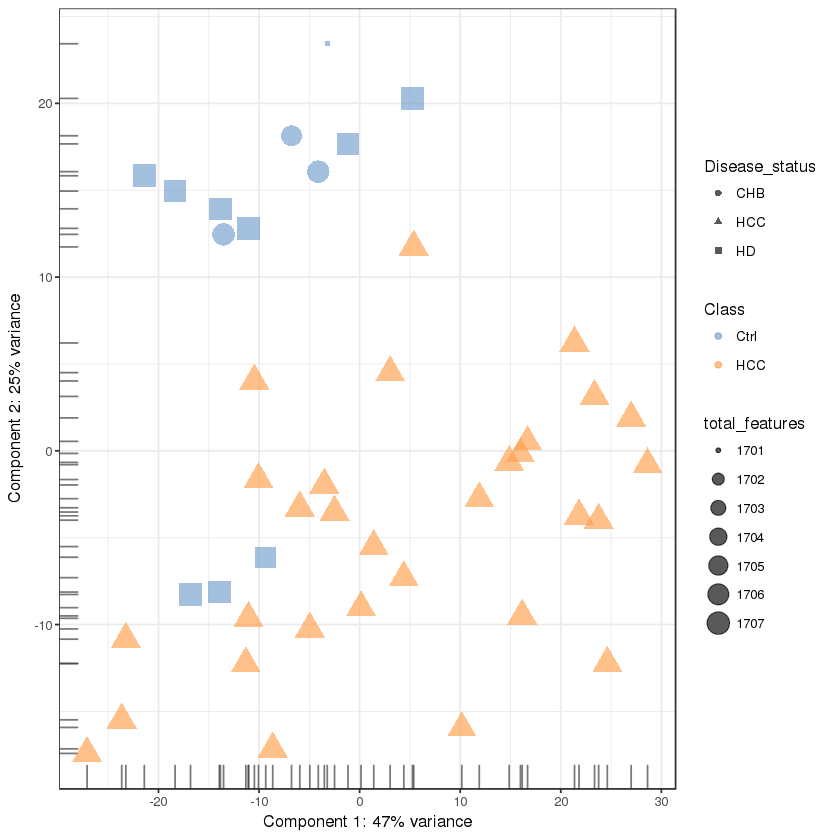

In [89]:
plotPCA(
    reads.qc.impute[endog_genes, ],
    exprs_values = "logcounts_raw",
    colour_by = "Class",
    shape_by = "Disease_status",
    size_by = "total_features"
)

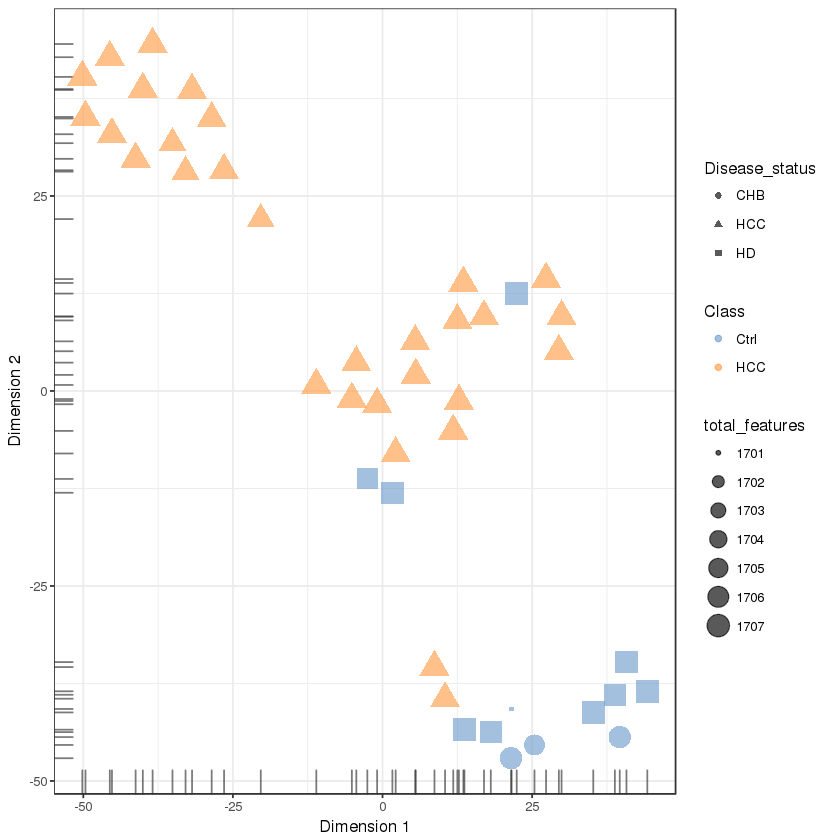

In [90]:
plotTSNE(
    reads.qc.impute[endog_genes, ],
    exprs_values = "logcounts_raw",
    perplexity = 8,
    colour_by = "Class",
    shape_by = "Disease_status",
    size_by = "total_features",
    rand_seed = 123456,
    ntop = 300
)

In [91]:
head(counts(reads.qc.impute))
saveRDS(counts(reads.qc.impute), file = "new_feature/imputation/feature_1_imputationresults.rds")

,lulab_249136_B,lulab_385247_B,lulab_423976_B,lulab_497411_B,lulab_497497_B,lulab_498127_B,lulab_498187_B,lulab_498221_B,lulab_507450_B,lulab_507468_B,⋯,lulab_Normal_2,lulab_Normal_3,lulab_Normal_4,lulab_Normal_5,lulab_Normal_6,lulab_Normal_7,lulab_Normal_8,lulab_HBV_1,lulab_HBV_2,lulab_HBV_3
peak_1;12979_0_60,239,112,116,209,130,91,142,125,66,109,⋯,25,54,59,33,70,51,274,50,81,61
peak_2;12985_20_72,249,218,110,232,64,62,49,107,57,145,⋯,92,49,116,78,87,129,196,102,125,94
peak_3;12991_20_72,216,215,115,263,67,57,50,98,61,134,⋯,108,44,94,113,92,118,184,115,126,104
peak_4;12993_0_72,826,486,394,948,295,311,266,408,217,400,⋯,105,186,174,125,208,191,824,182,290,190
peak_5;13011_0_60,311,515,370,253,77,146,432,387,378,780,⋯,340,266,258,390,491,658,212,407,391,383
peak_6;13013_20_72,589,285,276,816,221,244,139,279,114,198,⋯,29,102,105,63,53,54,712,83,164,77


**********************
## normalization

In [92]:
reads.qc.impute
#counts logcounts_raw 是取log2的

class: SingleCellExperiment 
dim: 1707 43 
metadata(0):
assays(2): counts logcounts_raw
rownames(1707): peak_1;12979_0_60 peak_2;12985_20_72 ...
  peak_1726;piR-hsa-963_0_31 peak_1727;piR-hsa-993_0_28
rowData names(8): is_feature_control mean_counts ... total_counts
  log10_total_counts
colnames(43): lulab_249136_B lulab_385247_B ... lulab_HBV_2 lulab_HBV_3
colData names(36): X Sample_ID ... pct_counts_top_500_features
  is_cell_control
reducedDimNames(0):
spikeNames(0):

In [93]:
# CPM
logcounts(reads.qc.impute) <- log2(calculateCPM(reads.qc.impute, use.size.factors = FALSE) + 1)

In [94]:
# scran (CPM)
library(scran)
# define cluster for each sample
sampleLables <- c()
for(i in colnames(reads.qc.impute)){tmp <- as.character(wholeanno[which(wholeanno$Sample_ID==i),"Class"]); sampleLables <- c(sampleLables,tmp)}

# sampleLables <- quickCluster(reads.qc.impute, min.size = 10)
sampleLables <- replace(sampleLables, which(sampleLables=="HCC"),1)
sampleLables <- replace(sampleLables, which(sampleLables=="Ctrl"),2)
sampleLables <- as.numeric(sampleLables)
reads.qc.impute <- computeSumFactors(reads.qc.impute, sizes = 5, clusters = sampleLables)
reads.qc.impute <- normalize(reads.qc.impute)

Loading required package: BiocParallel


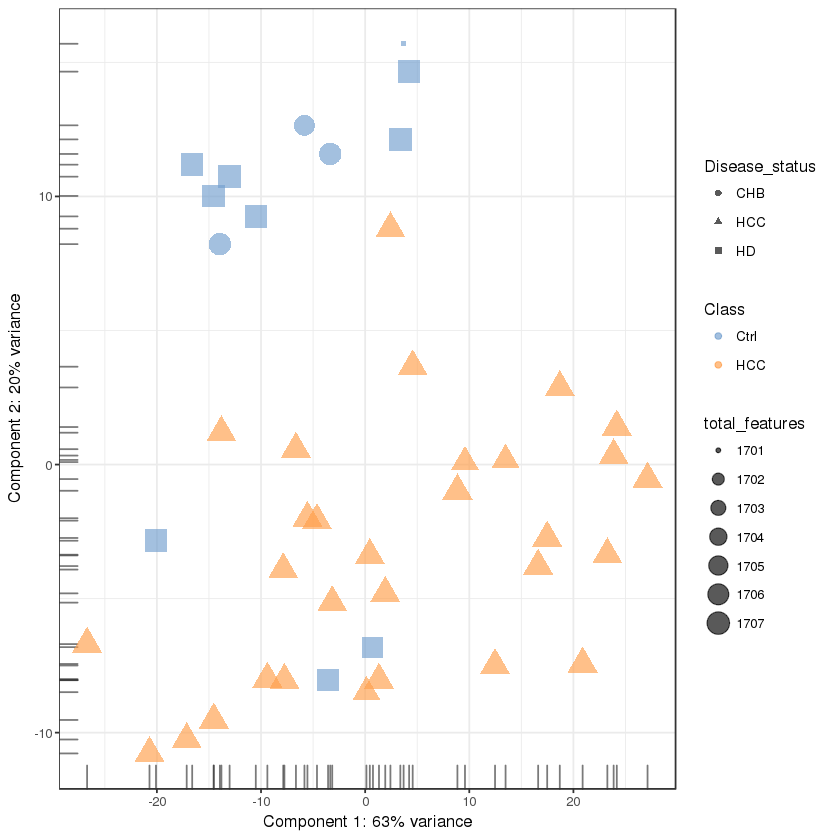

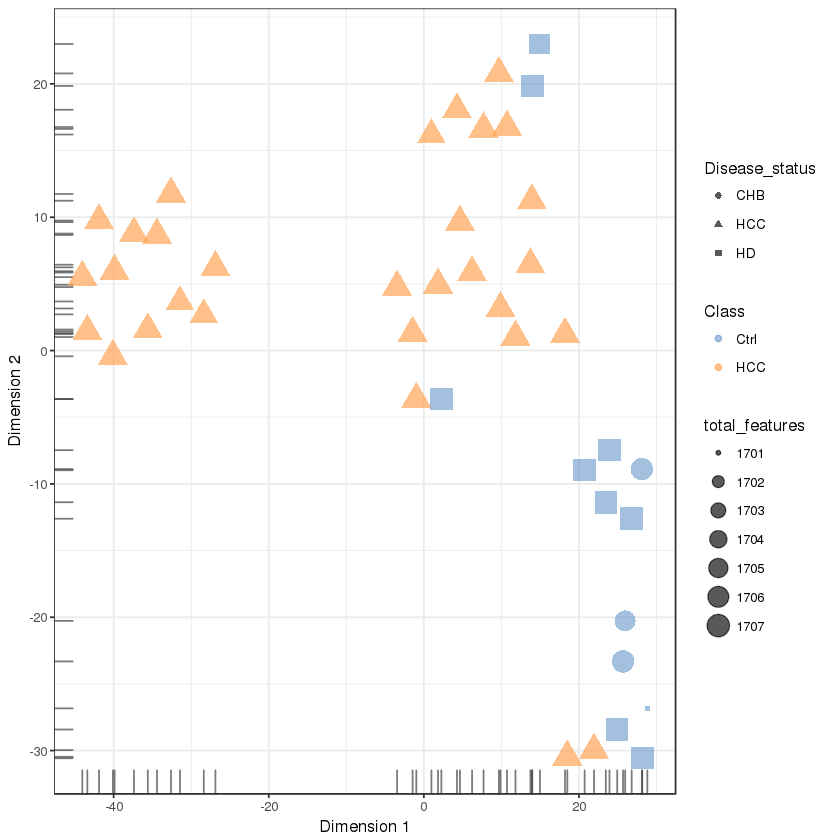

In [96]:
plotPCA(
    reads.qc.impute,
    exprs_values = "logcounts",
    colour_by = "Class",
    shape_by = "Disease_status",
    size_by = "total_features",
    ntop = 300
)

plotTSNE(
    reads.qc.impute,
    exprs_values = "logcounts",
    check_duplicates = FALSE,
    perplexity = 8,
    colour_by = "Class",
    shape_by = "Disease_status",
    size_by = "total_features",
    rand_seed = 123456,
    ntop = 300
)

### save data after normalization

In [98]:
write.csv(raw_mx[which(rownames(raw_mx) %in% top20name),],'new_feature/top20/feature1_top20.csv')

In [99]:
inputF1 <- t(assay(reads.qc.impute, i="logcounts"))
write.csv(data.frame(sampleID = rownames(inputF1), lables = sampleLables, inputF1),'new_feature/preprocessed/preprocessed_feature1.csv')
